In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Github\wine_quality_app\research\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#df.loc[df.duplicated()]
df.duplicated().sum()

240

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(1359, 12)

In [11]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pylab as plt

plt.style.use('ggplot')

Text(0, 0.5, 'Counts')

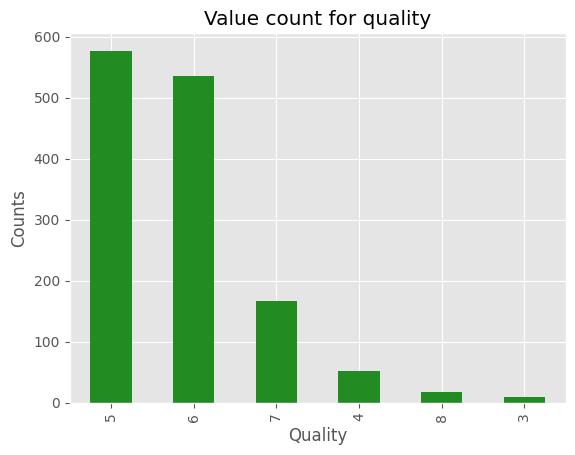

In [13]:
ax = df['quality'].value_counts().plot(kind='bar', title='Value count for quality', color='forestgreen')

ax.set_xlabel('Quality')
ax.set_ylabel('Counts')

Text(0.5, 0, 'quality')

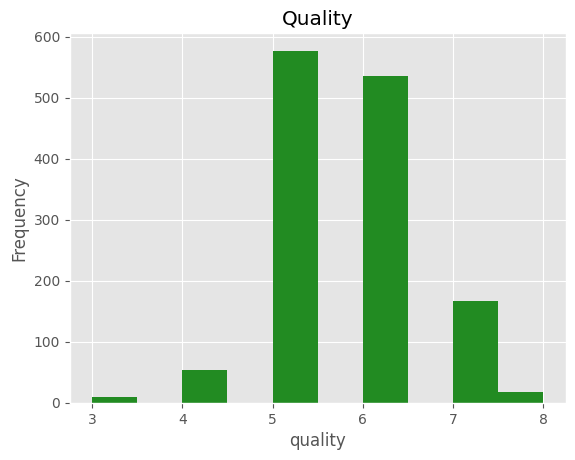

In [14]:
ax = df['quality'].plot(kind='hist',
                        title='Quality',
                        color='forestgreen')

ax.set_xlabel('quality')

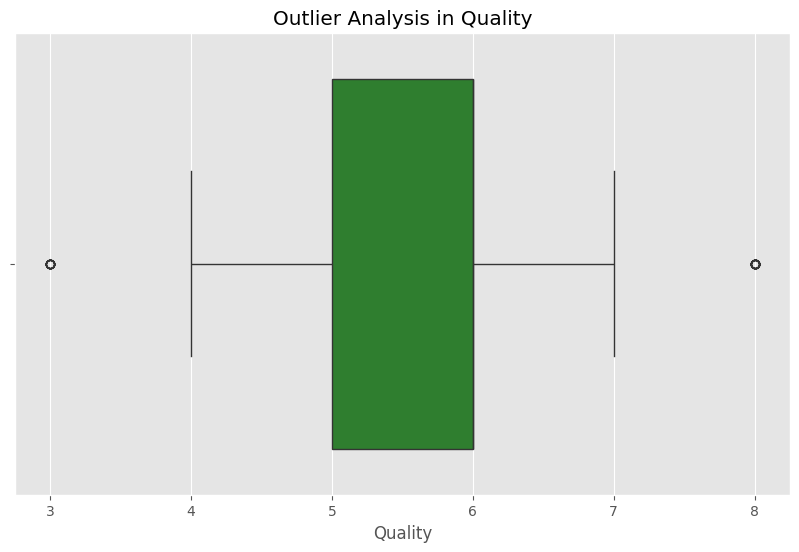

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['quality'], color='forestgreen')
plt.title('Outlier Analysis in Quality')
plt.xlabel('Quality')
plt.show()

In [16]:
Q1 = df['quality'].quantile(0.25)
Q3 = df['quality'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR

df_no_outliers = df[(df['quality'] >= lower_bound) & (df['quality'] <= upper_bound)]

print('Original data shape:', df.shape)
print('No outliers data shape:', df_no_outliers.shape)

Original data shape: (1359, 12)
No outliers data shape: (1332, 12)


In [17]:
data = df_no_outliers

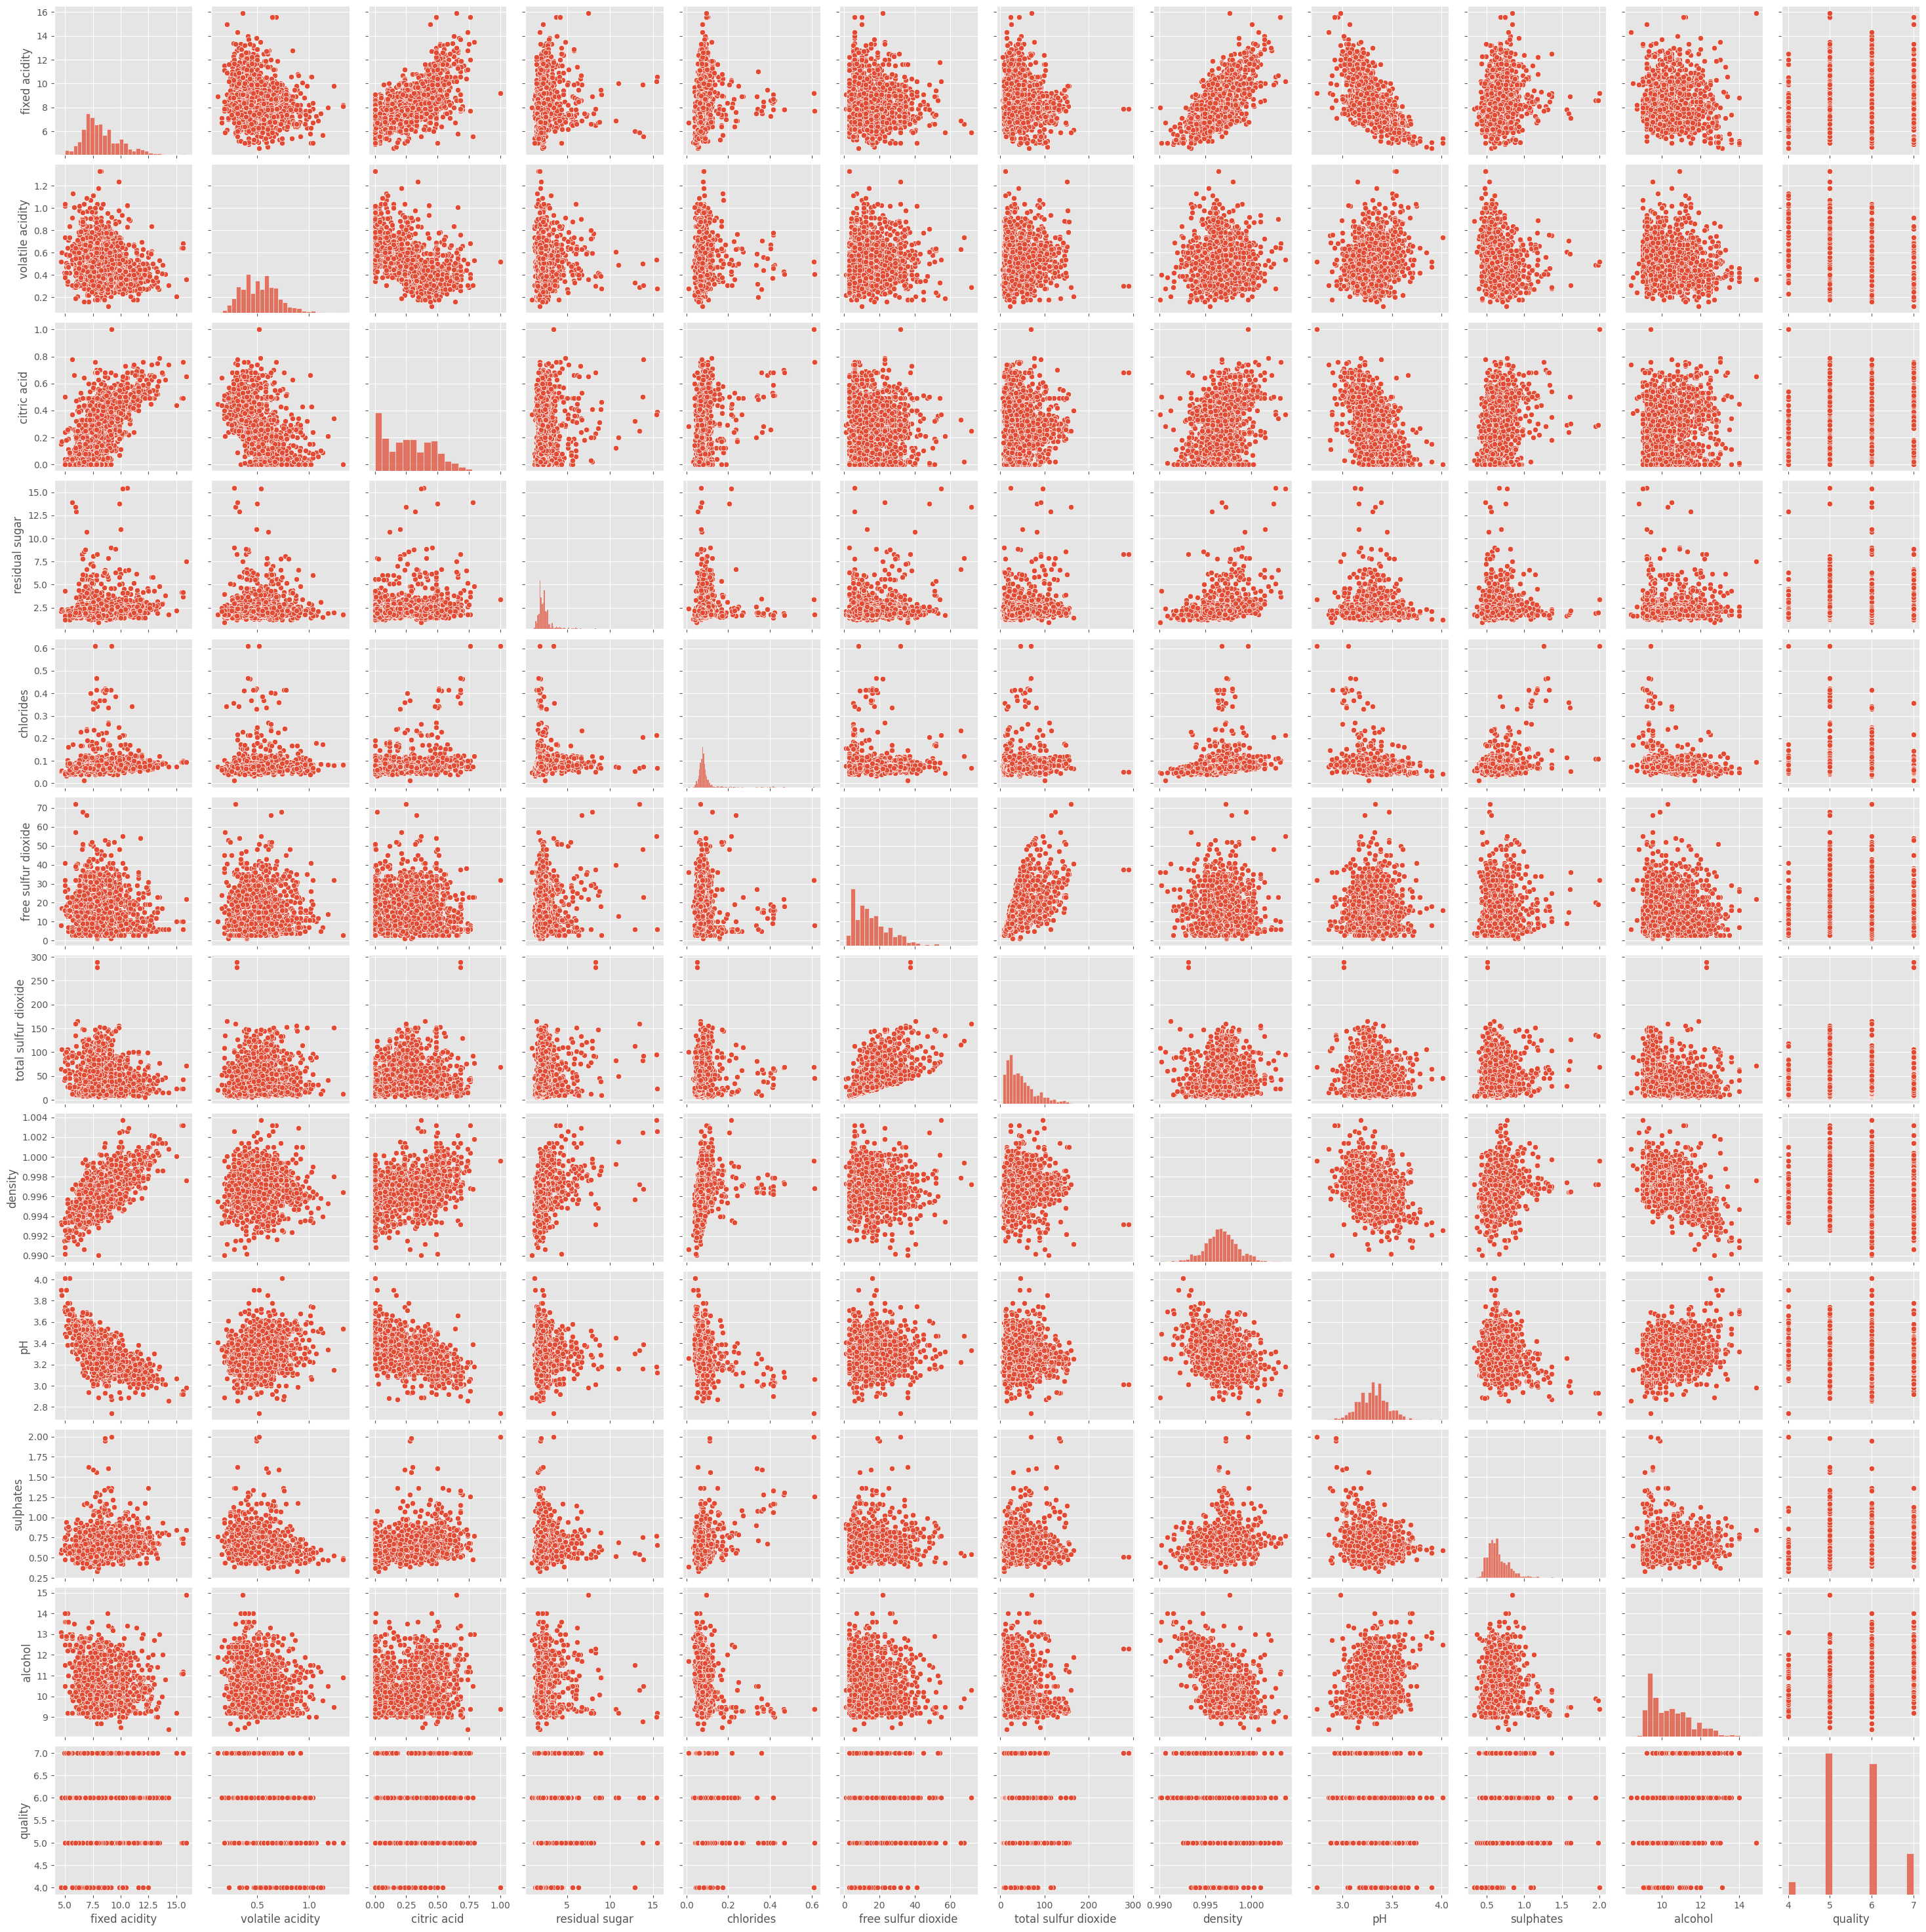

In [18]:
sns.pairplot(data)
plt.show()

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


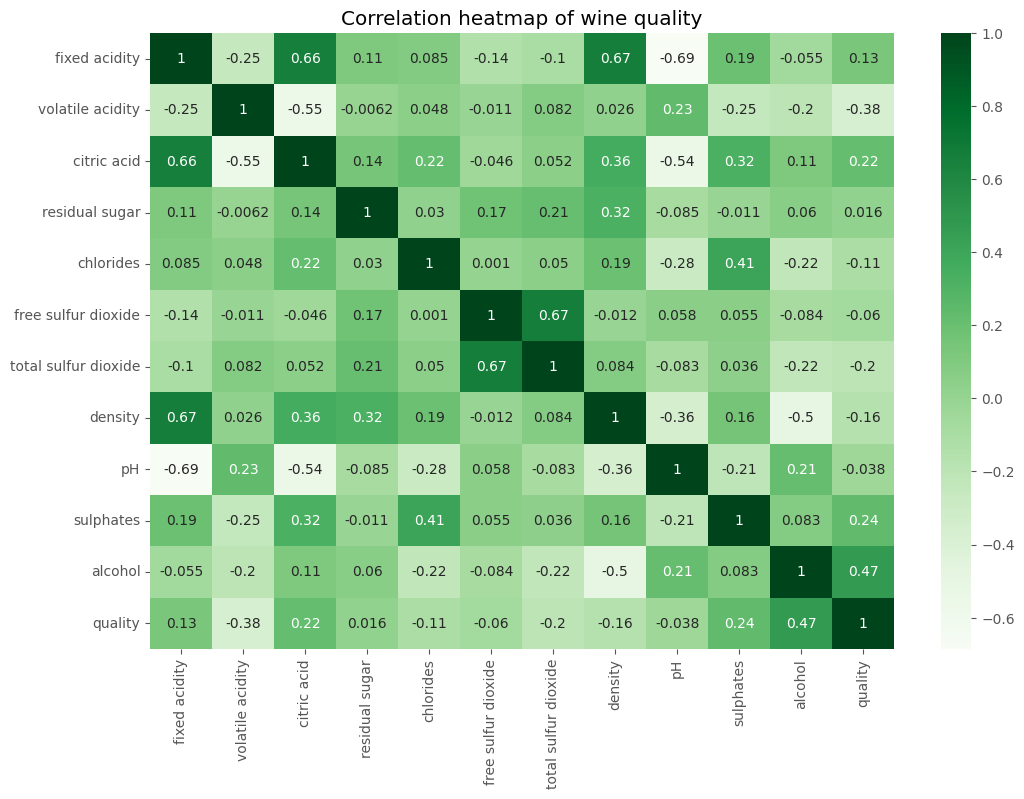

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title('Correlation heatmap of wine quality')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

features = data.drop(['quality'], axis=1)

normalizer =  Normalizer().fit(features)
f_norm =  normalizer.transform(features)

#features = pd.DataFrame(f_norm)
#features.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol']
target = data['quality']


X_train, X_test, y_train, y_test = train_test_split(f_norm, target, test_size=0.2, random_state=42)

print(f'Training data: {X_train.shape}')
print(f'Training data: {X_test.shape}')
print(f'Testing data: {y_train.shape}')
print(f'Testing data: {y_test.shape}')


Training data: (1065, 11)
Training data: (267, 11)
Testing data: (1065,)
Testing data: (267,)


X_train_const =  sm.add_constant(X_train)
X_train_const.shape

model_fitted = sm.OLS(y_train, X_train_const).fit()

print(model_fitted.summary())



In [22]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_test.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

X_train.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

X_train.head()
X_test.head()

print("y_train shape:", y_train.shape)
print("X_train shape:", X_train.shape)

y_train shape: (1065,)
X_train shape: (1065, 11)


In [23]:
#X_test = X_test.drop(['citric acid', 'residual sugar','density',
 #      'pH'], axis=1)

#X_train = X_train.drop(['citric acid', 'residual sugar','density',
 #      'pH'], axis=1)

In [24]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet() 

elastic_net.fit(X_train, y_train)

ElasticNet()

In [25]:
y_pred = elastic_net.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.5616338038075298
0.6588946914947864
-0.00025762565291764794


In [26]:
param_grid = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
}

In [27]:
from sklearn.model_selection import GridSearchCV

elastic_cv = GridSearchCV(elastic_net, param_grid, cv=3, scoring='neg_mean_squared_error')

elastic_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [28]:
y_pred2 = elastic_cv.predict(X_test)

print(mean_squared_error(y_test, y_pred2))
print(mean_absolute_error(y_test, y_pred2))
print(r2_score(y_test, y_pred2))

0.5515196134569114
0.650932420821084
0.01775552803713032


In [29]:
from sklearn.ensemble import RandomForestRegressor
Rand = RandomForestRegressor()
Rand.fit(X_train, y_train)


RandomForestRegressor()

In [30]:
y_pred3 = Rand.predict(X_test)

print(mean_squared_error(y_test, y_pred3))
print(mean_absolute_error(y_test, y_pred3))
print(r2_score(y_test, y_pred3))

0.40113595505617977
0.4962921348314606
0.2855855626061756


In [31]:
param_grid2 = {
    'max_features': [2, 4, 6, 8, 10],
    'n_estimators': [10, 20, 30, 40, 50],
}

In [32]:
param_grid3 = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [33]:
Random_cv = GridSearchCV(Rand, param_grid3, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

Random_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
Random_cv.best_params_

{'max_features': 4, 'n_estimators': 30}

In [35]:
Random_cv.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [36]:
y_pred4 = Random_cv.predict(X_test)

print(mean_squared_error(y_test, y_pred4))
print(mean_absolute_error(y_test, y_pred4))
print(r2_score(y_test, y_pred4))

0.41351643778610064
0.5066167290886392
0.26353619133273387


In [37]:
from sklearn.ensemble import AdaBoostRegressor
ADAmodel = AdaBoostRegressor()
ADAmodel.fit(X_train, y_train)

AdaBoostRegressor()

In [38]:
y_pred5 = ADAmodel.predict(X_test)

print(mean_squared_error(y_test, y_pred5))
print(mean_absolute_error(y_test, y_pred5))
print(r2_score(y_test, y_pred5))

0.45517839810698185
0.5718906018464494
0.18933714343338093


In [39]:
param_grid4 = {
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'n_estimators': [10, 20, 30, 40, 50, 60],
}

In [40]:
ADA_cv= GridSearchCV(ADAmodel, param_grid4, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
ADA_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 20, 30, 40, 50, 60]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
y_pred6 = ADA_cv.predict(X_test)

print(mean_squared_error(y_test, y_pred6))
print(mean_absolute_error(y_test, y_pred6))
print(r2_score(y_test, y_pred6))

0.46827623751352127
0.5683268403722912
0.16601017547463237


In [42]:
ADA_cv.best_estimator_

AdaBoostRegressor(n_estimators=60)

In [43]:
ADA_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 60}